In [3]:
from IPython.display import HTML
HTML("""
<video width="640" height="480" controls>
  <source src="nb_images/Supervised_Learning.mp4" type="video/mp4">
</video>
""")

In [151]:
from IPython.display import HTML
HTML("""
<video width="640" height="480" controls>
  <source src="nb_images/Exploratory data analysis.mp4" type="video/mp4">
</video>
""")

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [23]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"
df = pd.read_csv(url, sep=',', header = None)
df.columns = ['party', 'infants', 'water', 'budget', 'physician','salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration','synfuels','education',
                     'superfund', 'crime', 'duty_free_exports','eaa_rsa']

In [24]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


- ? : 0과 1중 랜덤값 대체
- y : 1로 대체
- n : 0으로 대체

In [145]:
def f(x):
    if x == "?":
        return np.random.randint(0, 2)
    elif x == "y":
        return 1
    elif x == "n":
        return 0
    else:
        return x

In [148]:
org_df = df.applymap(f)

In [152]:
org_df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1


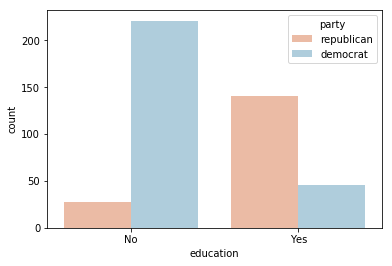

In [155]:
plt.figure()
sns.countplot(x='education', hue='party', data=org_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()